## Funcion de costo .

Recuerde que

$$\Theta^{(p)} \leftarrow  \Theta^{(p)} - \alpha \nabla J .$$


La funcion de costo multiclase que vamos a estudiar es la logistic.


$$J(\Theta) = -\frac1m \sum_{i=1}^m \sum_{k=1}^K y_i^{(k)} \log [ h(\theta, x^{(i)}] + (1 - y_i^{(k)}) \log [ 1 - h(\theta, x^{(i)}] + \frac{\lambda}{2 m} \sum_{l=1}^{L}
\sum_{i=1}^{n_j}  \sum_{j=1}^{n_i + 1} (\Theta_{ij}^{(l)})^2 .$$

# Propagacion hacia atras (Back-propagation)

Asumimos que tenemos una red neuronal (MLP) con $L+1$ capas.
* 1 de entrada
* 1 de salida
* L-1 ocultas

La hipotesis estan $\mathbb{R}^K$, de la forma
$h_i(\Theta, X)$. La funcion de costo, es la de arriba. Por ahora ignoramos la regularizacion.

Recuerden que necesitamos el gradiente de $J$ para poder hallar la solucion $\Theta$ optima.


El proceso se da en 5 partes.

1. Propagacion hacia adelante hasta la ultima capa.
2. Se calcula el gradiente con respecto a la ultima capa.
3. Se calcula el gradiente con respecto a las capas de la penultima hasta la primera.
4. Con el gradiente se puede actualizar $\Theta$
5. Se vuelve a iterar. El numero de iteraciones que se hagan se llama **epochs** (epocas)










Comencemos por propagar hacia adelante.
Vamos a usar la funcion de activacion sigmoid $S$, pero puede
ser cualquier otra. De hecho en el curso de DL ensenho este metodo
con una funcion arbiraria de activacion y el metodo es mas resumido y mas general.

1.
\begin{eqnarray}
A^{(1)} &=& X \\
A^{(2)} &=& S(Z^{(2)}) = S(X \Theta^{(1)}) \\
A^{(3)} &=& S(Z^{(3)}) = S(A^{(2)} \Theta^{(2)}) \\
&\vdots& \\
A^{(L-1)} &=& S(Z^{(L-1)}) = S(A^{(L-2)} \Theta^{(L-2)}) \\
A^{(L)} &=& S(Z^{(L)}) = S(A^{(L-1)} \Theta^{(L-1)}) \\
h(\Theta, X) &=& A^{(L+1)} = S(Z^{(L+1)}) = S(A^{(L)} \Theta^{(L)})
\end{eqnarray}

$h$ realmente es una matriz $h_{ij}$. Vamos a ignorar el rango de los indices, demasiado detalle, pero no podemos olvidar que si por ejemplo tenemos una matriz de activacion $A^{l}$, de dimensiones $m_l \times n_l$, multiplicada a una matriz $\Theta^{(l)}$, las dimensiones de $\Theta^{(l)}$ deben ser $n_l \times q_l$.

Tenemos entonces, que la hipotesis


$$h_{ij}(\Theta, X) = S \left ( \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)} \right ) = S_{ij} = A_{ij}^{(L+1)} $$

El gradiente de $h$ es un tensor de derivas parciales con respecto a $\Theta_{pq}^{(L)}$.

Recuerden que $S'(t) = S(t) (1 - S(t))$. Comenzamos`

$$\frac{\partial \Theta_{kj}^{(L)}}{\partial \Theta_{pq}^{(L)}} = \delta_{pk} \delta_{qj} $$


2.
\begin{eqnarray}
\frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(L)}} &=&
-\frac1m \sum_i \sum_j y_{ij} \frac{S_{ij}(1 - S_{ij})}{S_{ij}}
\sum_k A_{ik}^{(L)} \delta_{pk} \delta_{qj}
+ \frac1m \sum_i \sum_j (1- y_{ij}) \frac{S_{ij}(1-S_{ij})}{1 -S_{ij}} \sum_k A_{ik}^{(L)} \delta_{pk} \delta_{qj} \\
&=&
\frac1m \sum_i -y_{iq} (1 -S_{iq}) A_{ip}^{(L)}  +
(1 - y_{iq}) S_{iq} A_{ip}^{(L)} \\
&=&\frac1m \sum_i ( -y_{iq} + y_{iq} S_{iq} + S_{iq} - y_{iq} S_{iq}   )  A_{ip}^{(L)}\\
&=& \frac1m \sum_i (S_{iq} - y_{iq}) A_{ip}^{(L)}  \\
&=& \frac1m \sum_i  (A_{iq}^{(L)} - y_{iq}) A_{ip}^{(L)} \\
&=& \frac1m (A^{(L)})^T_p (A^{(L+1)} - Y)_q
\end{eqnarray}

El gradiente con respecto a los pesos de la ultima capa es


$$\left ( \frac{\partial J(\Theta, X)}{\partial \Theta^{(L)}}  \right )_{pq}  = \frac1m  (A^{(L)})^T (A^{(L+1)} - Y)_{pq}.$$




Para hallar el gradiente con respecto a la capa $L-1$, escribimos.


$$ h_{ij}(\Theta, X) = S \left (  \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)}   \right ) = A_{ij}^{(L+1)} .$$

A su vez (necesito ver $\Theta^{(L-1)}$

$$A_{ik}^{(L)} = S(Z_{ik}^{(L)})= S \left ( \sum_r A_{ir}^{(L-1)} \Theta_{rk}^{(L-1)}  \right ) .$$

3.
\begin{eqnarray}
\frac{\partial \log( h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} &=& \frac{S_{ij}(1- S_{ij})}{S_{ij}} \sum_k \frac{\partial A_{ik}^{(L)}}{\Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \\
&=& (1 - A_{ij}^{(L+1)}) \sum_k  \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)}
\end{eqnarray}

Toca hallar la derivada parcial $\partial A_{ik}^{(L)}/\partial \Theta_{pq}^{(L-1)}$.  Veamos


$$ \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1}} = S_{ik}(1 - S_{ik}) \sum_r A_{ir}^{(L-1)} \delta_{rp} \delta_{kq} = A_{ik}^{(L)} ( 1 - A_{ik}^{(L)}) A_{ip}^{(L-1)} \delta_{kq}.$$






De forma que

\begin{eqnarray}
\frac{\partial \log( h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} &=&
(1 - A_{ij}^{(L+1)}) ( A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)}
\end{eqnarray}

Ahora,

\begin{eqnarray}
\frac{\partial \log [ 1 - h_{ij}(\Theta, X)]}{\partial \Theta_{pq}^{(L-1)}} &=& -\frac{S_{ij} (1 - S_{ij})}{1 -S_{ij}}  \sum_k \frac{\partial A_{ik}^{(L)}}{\Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \\
&=&-A_{ij}^{(L+1)}  \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \\
&=& -A_{ij}^{(L+1)} \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} \right )  A_{ip}^{(L-1)} \Theta_{qj}^{(L)}
\end{eqnarray}

Combinamos los dos resultados anteriores


\begin{eqnarray}
y_{ij} \frac{\partial \log[ h_{ij}(\Theta, X)]}{\partial \Theta_{pq}^{(L-1}} + (1 - y_{ij}) \frac{\partial( 1 - h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1}} &=&
( A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)}
[y_{ij} (1 - A_{ij}^{(L+1)}) - (1 - y_{ij}) A_{ij}^{(L+1)} \\
&=& (y_{ij} - A_{ij}^{(L+1)} )( A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)}
\end{eqnarray}

\begin{eqnarray}
\frac{\partial J(\Theta, X}{\partial \Theta_{pq}^{(L-1}}
&=& \frac1m \sum_i \sum_j (A_{ij}^{(L+1)} - y_{ij}) A_{iq}^{(L)}(1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)} \\
&=& \frac1m \sum_i A_{iq}^{(L)} (1` - A_{iq}^{(L)}) A_{ip}^{(L-1)} \sum_j (A_{ij}^{(L+1)} - y_{ij}) \Theta_{qj} \\
&=& \frac1m \sum_i A_{iq}^{(L)} (1 - A_{iq})^{(L)} [ (A^{(L+1)} - Y) ((\Theta^{(L)})^T]_{iq} \\
&=& \frac1m A_{ip}^{(L-1)} [A^{(L+1)} - Y)( \Theta^{(L)})^T]_{iq} A_{iq}^{(L)} (1 - A_{iq}^{(L)}) \\
&=& \frac1m \sum_i  A_{ip}^{(L-1)} [A^{(L+1)} - Y)( \Theta^{(L)})^T]_{iq}  [ A^{(L)} .* (1 -A^{(L)})]_{iq} \\
&=& \frac1m (A_{ip}^{(L-1)})^T
[A^{(L+1)} - Y)( \Theta^{(L)})^T]_{iq}  [ A^{(L)} .* (1 -A^{(L)})]_{q}
\end{eqnarray}

En general, repitiendo el mismo proceso encontramos

$$ \frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(I)}}
= \frac1m (A^{(I)})_p^T \left [  [ A^{(I+2} - Y )(\Theta^{(I+1)} )^T ] \left ( A^{(I+1)}.*(1 - A^{(I+1})  \right )  \right ]q. $$



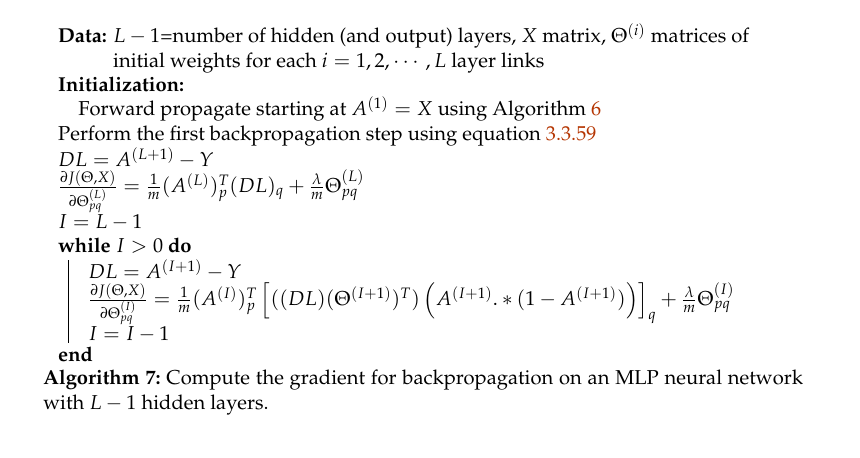

## Proxima clase. Ver el gradiente con respecto al termino de regularizacion
